# Gender Detection based on Twitter profile information

 - Predict user gender based on Twitter profile information with text-data
 
Original source
 - https://www.kaggle.com/tranctan96/cleaning-data-applying-some-ml-models

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#from sklearn_pandas import DataFrameMapper # Notice that this is actually Sklearn-Pandas library
%matplotlib inline

# %% import twitter data
data = pd.read_csv("gender-classifier.csv",encoding = "latin1")
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [2]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
data.description.head()

0                                i sing my own rhythm.
1    I'm the author of novels filled with family dr...
2                  louis whining and squealing and all
3    Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
Name: description, dtype: object

In [4]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


## Clean Data

In [5]:
# Drop unnecessary columns/features
data.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text                     20050 non-null object
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 2.3+ MB


## Gender info

In [7]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

### Drop unknown gender values

In [8]:
id_unknown = data[data['gender'] == 'unknown'].index
data = data.drop(index = id_unknown)

data['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [9]:
data['profile_yn'].value_counts()

yes    18836
no        97
Name: profile_yn, dtype: int64

In [10]:
drop_items_idx = data[data['profile_yn'] == 'no'].index
data.drop (index = drop_items_idx, inplace = True)
print (data['profile_yn'].value_counts())

data.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [11]:
# Double check the data 
print (data['gender'].value_counts())

print ('---------------------------')
data.info()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 13 columns):
_golden               18836 non-null bool
_unit_state           18836 non-null object
_trusted_judgments    18836 non-null int64
gender                18836 non-null object
gender:confidence     18836 non-null float64
description           15522 non-null object
fav_number            18836 non-null int64
gender_gold           50 non-null object
link_color            18836 non-null object
name                  18836 non-null object
retweet_count         18836 non-null int64
sidebar_color         18836 non-null object
text                  18836 non-null object
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 1.9+ MB


In [12]:
print ('Full data items: ', data.shape)
print ('Data with label-confidence < 100%: ', data[data['gender:confidence'] < 1].shape)

Full data items:  (18836, 13)
Data with label-confidence < 100%:  (5032, 13)


In [13]:
drop_items_idx = data[data['gender:confidence'] < 1].index

data.drop (index = drop_items_idx, inplace = True)

print (data['gender:confidence'].value_counts())

data.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


In [14]:
data.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

# Double check the data 
print (data['gender'].value_counts())

print ('---------------------------')
data.info()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 8 columns):
gender           13804 non-null object
description      11773 non-null object
fav_number       13804 non-null int64
link_color       13804 non-null object
name             13804 non-null object
retweet_count    13804 non-null int64
sidebar_color    13804 non-null object
text             13804 non-null object
dtypes: int64(2), object(6)
memory usage: 970.6+ KB


## Intro to text Mininig

In [15]:
from collections import Counter

twit_vocab = Counter()
for twit in data['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1

In [16]:
twit_vocab.most_common(20)

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

In [17]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uzaycetin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [19]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!!@ twit :) is <b>nice</b>'))

this twit is nice :)


In [20]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


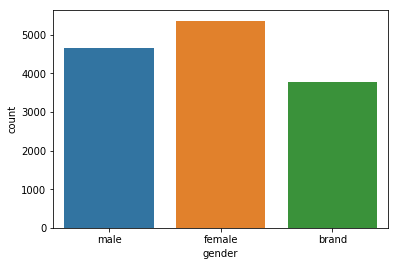

In [21]:
sns.countplot(data['gender'],label="Gender")

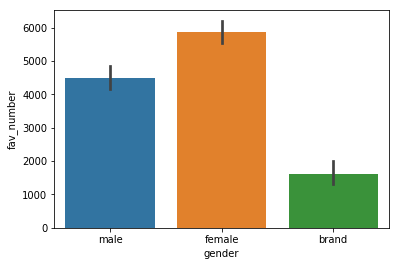

In [22]:
sns.barplot (x = 'gender', y = 'fav_number',data = data)

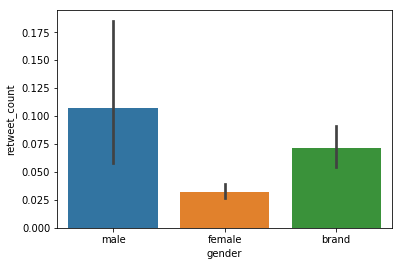

In [23]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


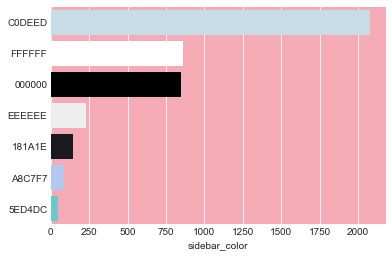

In [24]:
male_top_sidebar_color = data[data['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color, palette=list(map(l, male_top_color)))

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366']


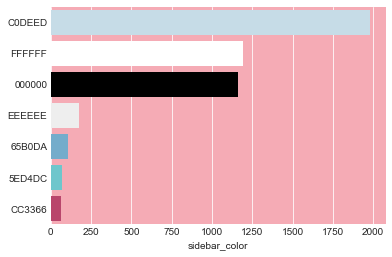

In [25]:
female_top_sidebar_color = data[data['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color)))

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' 'ABB8C2']


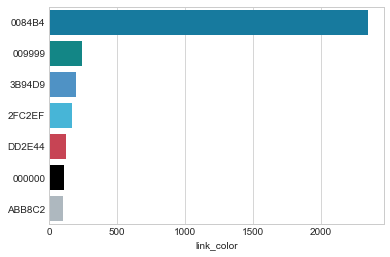

In [26]:
male_top_link_color = data[data['gender'] == 'male']['link_color'].value_counts().head(7)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_top_link_color, y = male_top_link_color_idx, palette=list(map(l, male_top_color)))

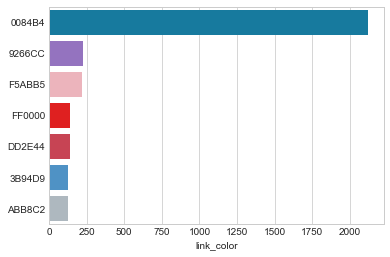

In [27]:
female_top_link_color = data[data['gender'] == 'female']['link_color'].value_counts().head(7)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_top_link_color, y = female_top_link_color_idx, palette=list(map(l, female_top_color)))

### Machine Learning Part

In [28]:
# Firstly, convert categorical labels into numerical ones
# Function for encoding categories
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])


# split the dataset in train and test
X = data['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()

19087    @rvpisarapist my players literally give 110% a...
11212    Backers of the atrium lobby considered joining...
14799    I was supposed to receive my @SpiritHalloween ...
6846     Depression comes when you least expect it, lik...
1226     Grimes Throws a Fun, Bloody Party in "Flesh Wi...
Name: text, dtype: object

In [31]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5999517141477547
Confusion matrix:
 [[ 872  116  148]
 [ 215 1051  344]
 [ 256  578  562]]
Classification report:
              precision    recall  f1-score   support

          0       0.65      0.77      0.70      1136
          1       0.60      0.65      0.63      1610
          2       0.53      0.40      0.46      1396

avg / total       0.59      0.60      0.59      4142



# Concatenating 'description' to 'text

In [33]:
#Fill NaN with empty string
data.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
data['text_description'] = data['text'].str.cat(data['description'], sep=' ')

data['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13804
Name: text_description, dtype: int64

In [34]:
# split the dataset in train and test
X = data['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()
X_train.isnull().values.any() # Check if any null values, True if there is at least one.

False

In [35]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6817962337035248
Confusion matrix:
 [[ 959   80   97]
 [ 137 1192  281]
 [ 191  532  673]]
Classification report:
              precision    recall  f1-score   support

          0       0.75      0.84      0.79      1136
          1       0.66      0.74      0.70      1610
          2       0.64      0.48      0.55      1396

avg / total       0.68      0.68      0.67      4142



### Conclusion
> The results show that Only the Tweet text can yield a moderate accuracy, although it's not sustantially high. But with the content from the Description, the classifiers actually improve its performance significantly.

## More about tf-idf

The Wikipedia definition reads like this:
> tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.



In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    return stems

# your corpus
text = ["This is your first text book", "This is the third text for analysis", "This is another text"]
# word tokenize and stem
text = [" ".join(tokenize(txt.lower())) for txt in text]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text).todense()
# transform the matrix to a pandas df
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)

In [37]:
matrix

,analysi,anoth,book,first,for,is,text,the,thi,third,your
0,0.000000,0.00000,0.49712,0.49712,0.000000,0.293607,0.293607,0.000000,0.293607,0.000000,0.49712
1,0.445149,0.00000,0.00000,0.00000,0.445149,0.262912,0.262912,0.445149,0.262912,0.445149,0.00000
2,0.000000,0.69903,0.00000,0.00000,0.000000,0.412859,0.412859,0.000000,0.412859,0.000000,0.00000


In [38]:
top_words

thi        0.969378
text       0.969378
is         0.969378
anoth      0.699030
your       0.497120
first      0.497120
book       0.497120
third      0.445149
the        0.445149
for        0.445149
analysi    0.445149
dtype: float64

### term frequency
$$tf = \frac{count(word, document)}{len(document} $$

### inverse document frequency
$$idf = \frac{log( len(collection) }{ count(documents containing term, collection)} $$

In [56]:
# your corpus
text = ["The for you book book book book", "The for you text text text", "The for you analysis analysis"]

In [57]:
# word tokenize and stem
text = [" ".join(tokenize(txt.lower())) for txt in text]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text).todense()
# transform the matrix to a pandas df
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
matrix

,analysi,book,for,text,the,you
0,0.000000,0.968819,0.143050,0.000000,0.143050,0.143050
1,0.000000,0.000000,0.186337,0.946486,0.186337,0.186337
2,0.890298,0.000000,0.262912,0.000000,0.262912,0.262912


In [58]:
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)
top_words

book       0.968819
text       0.946486
analysi    0.890298
you        0.592299
the        0.592299
for        0.592299
dtype: float64